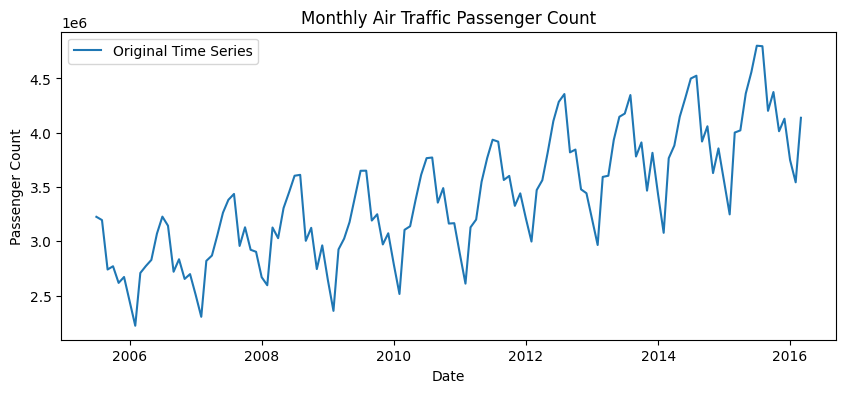

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 319ms/step - loss: 0.2988 - val_loss: 0.3191
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1248 - val_loss: 0.0946
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0457 - val_loss: 0.0273
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0331 - val_loss: 0.0414
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0403 - val_loss: 0.0277
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0231 - val_loss: 0.0350
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0280 - val_loss: 0.0512
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0295 - val_loss: 0.0558
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0323 - val_loss: 0.0481
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0280 - val_loss: 0.0374
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0233 - val_loss: 0.0308
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0237 - val_loss: 0.0283


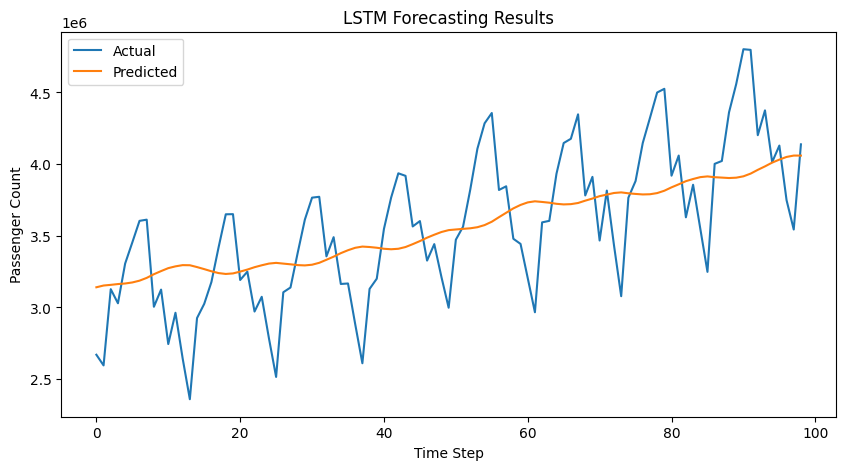

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and process the dataset
file_path = '/content/Air_Traffic_Passenger_Statistics.csv'
df = pd.read_csv(file_path)

# Filter the data (optional: by airline or region to simplify)
# df = df[df['Operating Airline'] == 'United Airlines']
# df = df[df['GEO Region'] == 'Domestic']

# Group by Activity Period and sum Passenger Count
df = df.groupby('Activity Period')['Passenger Count'].sum().reset_index()
df.columns = ['Date', 'Value']

# Convert Date from YYYYMM to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')
df.set_index('Date', inplace=True)

# Plot the original time series
plt.figure(figsize=(10, 4))
plt.plot(df, label='Original Time Series')
plt.title("Monthly Air Traffic Passenger Count")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.show()

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Value']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 30
X, y = create_sequences(scaled_data, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(32),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Make predictions
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(actual, label='Actual')
plt.plot(predicted, label='Predicted')
plt.title('LSTM Forecasting Results')
plt.xlabel('Time Step')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()
